In [1]:
using HierarchicalDriving
import POMDPs:initial_state
using POMDPToolbox
using Interact
using MCTS
using AutoViz
import ParticleFilters: obs_weight
import Base: ==, +, *, -, <, >, copy, Random, hash

In [2]:
n = 40
i = 7
cell_length = 75.0
nbr_cell_length = 25.0
n_ld_blocks = 1
n_adj_blocks = 1

1

In [3]:
p = SimulationMDP(n);

.

Interact.Options{:SelectionSlider,Int64}(Signal{Int64}(7, nactions=1),"i",7,"7",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(2=>"2",11=>"11",7=>"7",9=>"9",10=>"10",8=>"8",6=>"6",4=>"4",3=>"3",5=>"5"…)),Any[],Any[],true,"horizontal")

.

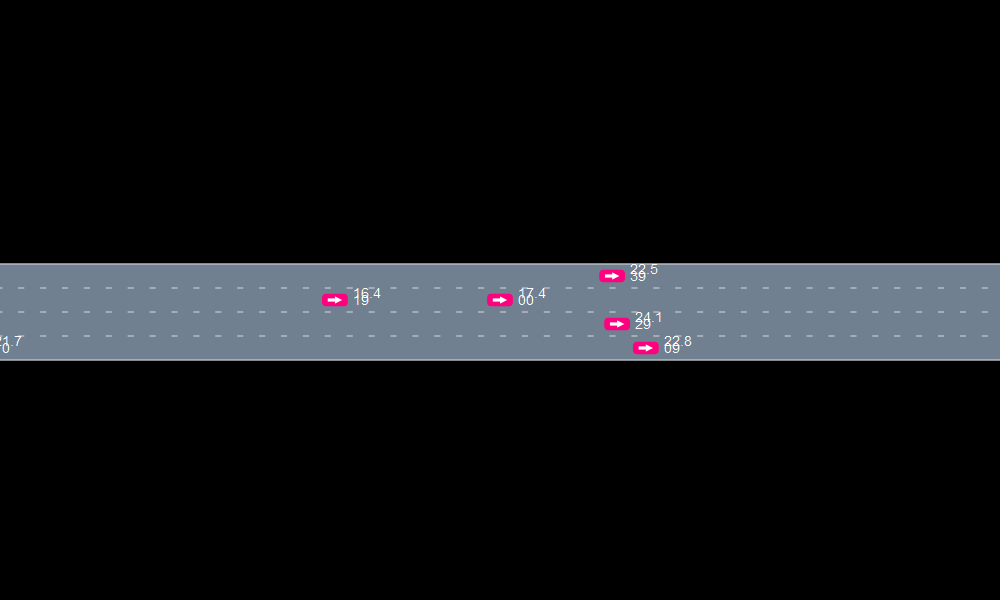

In [4]:
policyFileName = "../scratch/SingleAgentOccGrid/SingleAgentOccGridPolicy_$(n)_$(convert(Int64, cell_length))_$(convert(Int64,nbr_cell_length))_$(n_ld_blocks)_$(n_adj_blocks).jld"
hf2 = HierarchicalFramework2(p, policyFileName)
rng = MersenneTwister(i*29+1)
hp2 = HierarchicalPolicy2(hf2,rng)
hr = HistoryRecorder(max_steps = 150, rng = rng)
hist = simulate(hr, p, hp2);
@manipulate for i in 1:n_steps(hist)+1
    (p,state_hist(hist)[i],SceneOverlay[CarVelOverlay(), CarIDOverlay()])
end